In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import random
from ipynb.fs.full.call_sign_times import call_sign_times

In [33]:
data = r"clean_cad.csv"
clean_data = pd.read_csv(data)
clean_data["Call Time"] = pd.to_datetime(clean_data["Call Time"], errors='coerce')
clean_data

,Unnamed: 0,Call Time,Reason for Dispatch,Call Sign,2 Call Sign,Disposition
0,0,2016-01-01 00:00:04,ASSAULT,5E57,5E57,ADVISED
1,1,2016-01-01 00:00:04,ASSAULT,5E57,4X40,ADVISED
2,2,2016-01-01 00:00:04,ASSAULT,5E57,4E53,ADVISED
3,3,2016-01-01 00:00:24,TRAFFIC STOP,5T81,5T81,ADVISED
4,4,2016-01-01 00:02:45,CHECK WELFARE,3X90,3F61,ASSISTED
...,...,...,...,...,...,...
1267985,1616812,2023-12-31 22:44:38,DISPUTE,6E19,4K97,REPORT TAKEN
1267986,1616813,2023-12-31 22:44:38,DISPUTE,6E19,6E19,REPORT TAKEN
1267987,1616814,2023-12-31 22:44:38,DISPUTE,6E19,5X51,REPORT TAKEN
1267988,1616817,2023-12-31 22:56:40,TRAFFIC STOP,4F74,4F72,UNIFORM TRAFFIC CITATION ISSUED


In [34]:
target_call_signs = ["1J77", "3J78", "4J79"]

In [35]:
def calculate_counts(table: pd.DataFrame, call_signs: list):
    # Group by month and count calls
    monthly_call_count = table.groupby(table['Call Time'].dt.to_period('M')).size().rename('Total Calls')

    # Filter data for specific call signs
    monthly_cahoots = table[table['Call Sign'].isin(call_signs)]
    monthly_call_sign = monthly_cahoots.groupby(monthly_cahoots['Call Time'].dt.to_period('M')).size().rename('Cahoots Calls')

    # Merge the counts
    t_v_c = pd.merge(monthly_call_count, monthly_call_sign, left_index=True, right_index=True, how='left').reset_index()
    t_v_c['Call Time'] = t_v_c['Call Time'].dt.to_timestamp()

    # Ensure correct columns are displayed
    t_v_c = t_v_c[['Call Time', 'Cahoots Calls', 'Total Calls']]

    return t_v_c

In [36]:
total_vs_cahoot = calculate_counts(clean_data, target_call_signs)
total_vs_cahoot

,Call Time,Cahoots Calls,Total Calls
0,2016-01-01,414.0,12926
1,2016-02-01,374.0,13182
2,2016-03-01,424.0,12872
3,2016-04-01,397.0,12618
4,2016-05-01,454.0,13061
...,...,...,...
91,2023-08-01,NaN,12752
92,2023-09-01,NaN,11842
93,2023-10-01,NaN,11396
94,2023-11-01,NaN,10812


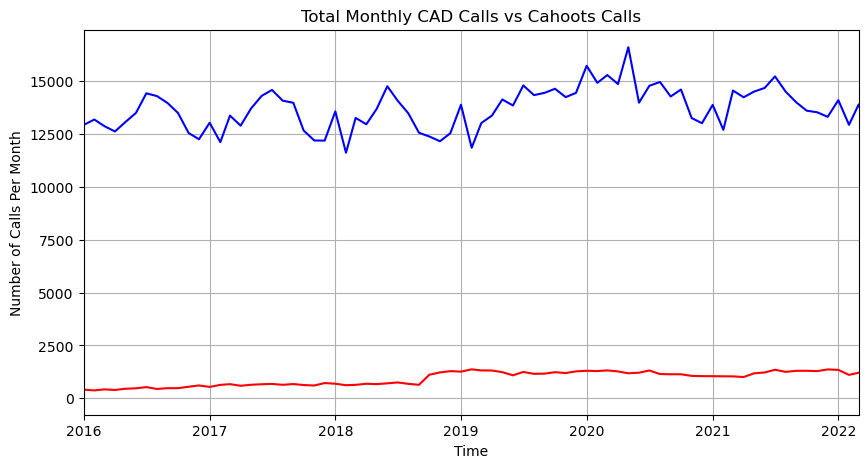

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Total Calls'], color='b')
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color='r')
plt.xlabel("Time")
plt.ylabel("Number of Calls Per Month")
plt.title("Total Monthly CAD Calls vs Cahoots Calls")
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
plt.grid("True")

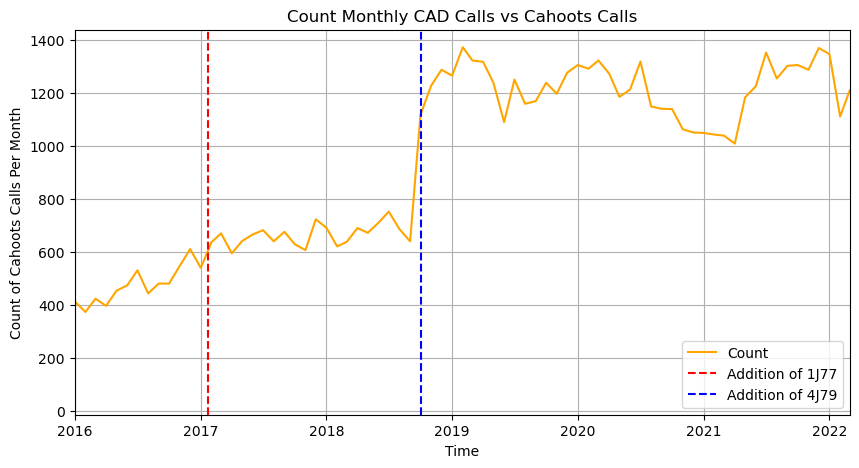

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color="orange", label="Count")
plt.ylabel("Count of Cahoots Calls Per Month")
plt.xlabel("Time")
plt.title("Count Monthly CAD Calls vs Cahoots Calls")
plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of 4J79', color='b', linestyle='--')
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
plt.legend(loc='lower right')
plt.grid("True")
plt.show()

In [39]:
total_vs_3J78 = calculate_counts(clean_data, ['3J78'])
total_vs_1J77 = calculate_counts(clean_data, ['1J77'])
total_vs_4J79 = calculate_counts(clean_data, ['4J79'])
total_vs_4J79

,Call Time,Cahoots Calls,Total Calls
0,2016-01-01,NaN,12926
1,2016-02-01,NaN,13182
2,2016-03-01,NaN,12872
3,2016-04-01,NaN,12618
4,2016-05-01,NaN,13061
...,...,...,...
91,2023-08-01,NaN,12752
92,2023-09-01,NaN,11842
93,2023-10-01,NaN,11396
94,2023-11-01,NaN,10812


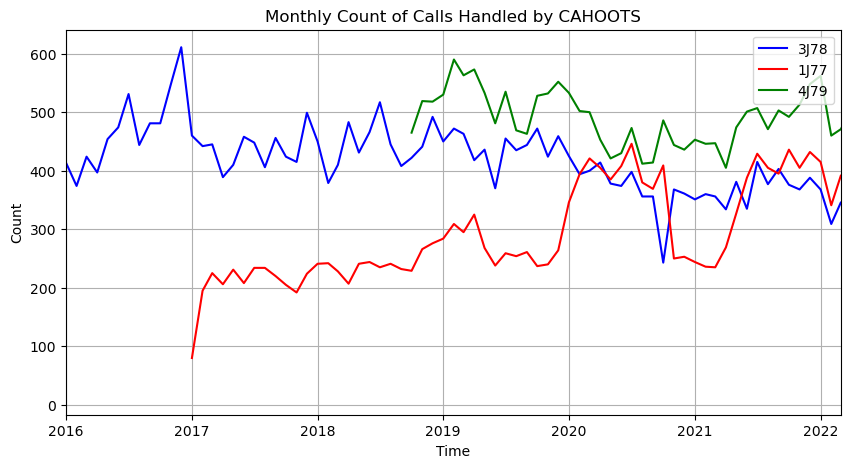

In [40]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(total_vs_3J78['Call Time'], total_vs_3J78['Cahoots Calls'], label="3J78", color='b')
plt.plot(total_vs_1J77['Call Time'], total_vs_1J77['Cahoots Calls'], label="1J77", color='r')
plt.plot(total_vs_4J79['Call Time'], total_vs_4J79['Cahoots Calls'], label="4J79", color='g')

plt.title('Monthly Count of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc='upper right')

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

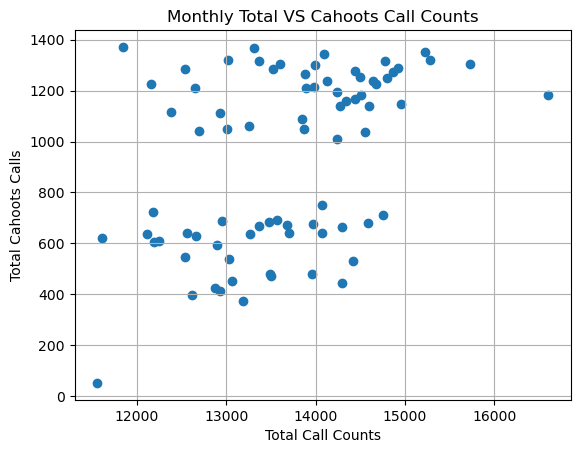

In [42]:
plt.scatter(total_vs_cahoot['Total Calls'], total_vs_cahoot['Cahoots Calls']) #, c=total_vs_cahoot["Color"])
plt.xlabel("Total Call Counts")
plt.ylabel("Total Cahoots Calls")
plt.title("Monthly Total VS Cahoots Call Counts")

total_vs_cahoot = total_vs_cahoot[:-1] # (Dropping a value that obscures the results)
plt.grid(True)
plt.show()

In [43]:
time_ranges = [
    (pd.Timestamp(call_sign_times['3J78']['First']), pd.Timestamp(call_sign_times['1J77']['First']), 'red'),
    (pd.Timestamp(call_sign_times['1J77']['First']), pd.Timestamp(call_sign_times['4J79']['First']), 'blue'),
    (pd.Timestamp(call_sign_times['4J79']['First']), pd.Timestamp(call_sign_times['1J77']['Last']), 'green')
]

# Function to assign colors based on time ranges
def assign_color(call_time, ranges):
    for start, end, color in ranges:
        if start <= call_time < end:
            return color
    return None  # Default color if no range is matched

# Apply the function to create a color column
total_vs_cahoot['Color'] = total_vs_cahoot['Call Time'].apply(lambda x: assign_color(x, time_ranges))
total_vs_cahoot = total_vs_cahoot.dropna(subset=['Color'])

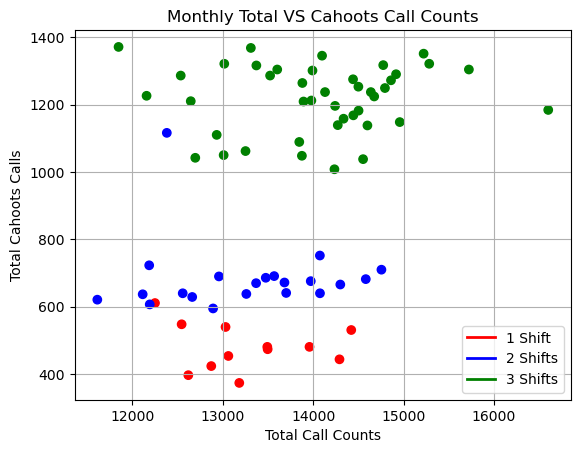

In [46]:
plt.scatter(total_vs_cahoot['Total Calls'], total_vs_cahoot['Cahoots Calls'], c=total_vs_cahoot["Color"])
plt.xlabel("Total Call Counts")
plt.ylabel("Total Cahoots Calls")
plt.title("Monthly Total VS Cahoots Call Counts")

custom_handles = [plt.Line2D([0], [0], color='red', lw=2, label='1 Shift'),
                  plt.Line2D([0], [0], color='blue', lw=2, label='2 Shifts'),
                  plt.Line2D([0], [0], color='green', lw=2, label='3 Shifts')]

plt.legend(handles=custom_handles, loc='lower right')
plt.grid("True")

total_vs_cahoot = total_vs_cahoot[:-1] # (Dropping a value that obscures the results)
plt.show()